## Libraries

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, ifft, rfft, fftfreq, fftshift
from scipy import signal
import scipy.io.wavfile as wavfile

## Functions

In [54]:
# wavFileLocation - file location of the .wav file
# timeStep - the step at time at which a fourier transformation is performed
def WavToFFT(wavFileLocation, timeStep):
    fftList = []

    # Step 1) Retrieve Wav File
    try:
        sampleRate, wavSignal = wavfile.read(wavFileLocation)
    except:
        print(f"ERROR: could not open {wavFileLocation} file")

    
    # Step 2) Define Time Step
    newSampleRate = sampleRate * timeStep
    currSample = 0

    # Step 3) Iterate over signal
    while currSample < np.size(wavSignal):
        fftList.append(fft(wavSignal[int(currSample):int(currSample)+int(newSampleRate)]))
        currSample += int(newSampleRate)
        if currSample > np.size(wavSignal):
            fftList.append(fft(wavSignal[int(currSample)-int(newSampleRate):]))
    
    return fftList, wavSignal, sampleRate

## Main

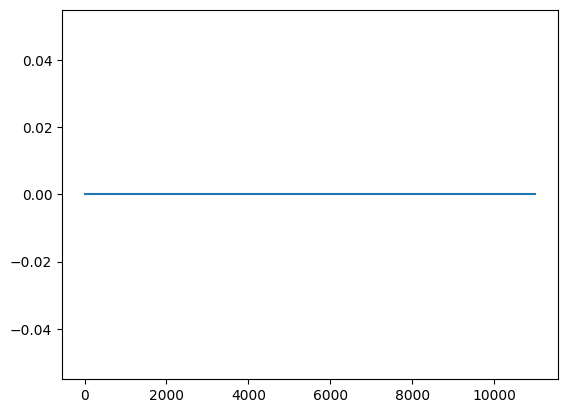

(551,)
In this case, the sine wave is moving at 0.0 Hz
Compare this YouTube video of a sine wave at 440 hz https://www.youtube.com/watch?v=xGXYFJmvIvk&t=29s and the sine.wav file
you'll notice that they sound the same showing that the fft is working accordingly


In [64]:
if __name__ == "__main__":
    # Testing output of FFT
    # In this case, the .wav file is being sampled every 1 seconds
    fftArr, wavSignal, sampleRate = WavToFFT("StarWars3.wav", 0.05)
    frequencies = fftfreq(len(fftArr[0]), 1 / sampleRate)
    sinWaveX = frequencies[frequencies >= 0]
    sinWaveY = np.abs(fftArr[0])[frequencies >= 0]

    # Here is the plot of the sin wave
    plt.plot(sinWaveX, sinWaveY)
    plt.show()

    # Here is the frequency
    sinWaveFrequency = sinWaveX[np.argmax(sinWaveY)]
    print(f"In this case, the sine wave is moving at {sinWaveFrequency} Hz")
    print(f"Compare this YouTube video of a sine wave at 440 hz https://www.youtube.com/watch?v=xGXYFJmvIvk&t=29s and the sine.wav file")
    print(f"you'll notice that they sound the same showing that the fft is working accordingly")